<a href="https://colab.research.google.com/github/balawillgetyou/herokuWebapp/blob/master/vLogix20200718.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
df = pd.read_csv('final_feat1.csv')

In [35]:
#exploring
print(df.columns)
df.describe()

Index(['Unnamed: 0', 'machineID', 'datetime', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'comp1', 'comp2', 'comp3', 'comp4',
       'model', 'age'],
      dtype='object')


,Unnamed: 0,machineID,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,comp1,comp2,comp3,comp4,age
count,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000
mean,18249.000000,50.500000,170.773717,446.613087,100.853535,40.384741,14.915419,49.953526,10.050724,5.004298,52.917747,50.883049,52.078819,53.184973,11.330000
std,10536.784263,28.866467,4.722695,18.067417,4.719795,2.057435,2.266017,7.643161,1.719334,0.799489,62.423458,59.144699,58.771389,59.611867,5.827695
min,0.000000,1.000000,156.645540,272.666626,91.137373,35.678604,7.186214,24.467579,4.145308,2.333070,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9124.500000,25.750000,168.060565,441.539364,98.688548,39.359869,13.351134,44.721894,8.919304,4.462993,13.000000,12.000000,13.000000,12.000000,6.750000
50%,18249.000000,50.500000,170.196332,449.161812,100.106025,40.073418,14.852685,49.599782,9.920774,4.959917,32.000000,29.000000,32.000000,32.000000,12.000000
75%,27373.500000,75.250000,172.477922,456.379312,101.606554,40.833657,16.417098,54.849048,10.982729,5.489604,68.000000,66.000000,67.000000,70.000000,16.000000
max,36498.000000,100.000000,218.918654,494.981214,152.215627,61.153180,27.001921,97.520193,28.429606,10.149927,491.000000,348.000000,370.000000,394.000000,20.000000


In [36]:
#features are in very different scales and difficult to understand. Rescale.
x = df[['voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h']
df_scaled = pd.concat([df['datetime'], df_scaled], axis=1)
print(df_scaled.head())
print(df_scaled.describe())

   datetime  voltmean_24h  ...  pressuresd_24h  vibrationsd_24h
0  1/3/2015      0.210175  ...        0.244379         0.450327
1  1/4/2015      0.210804  ...        0.319523         0.418086
2  1/5/2015      0.254808  ...        0.183831         0.736393
3  1/6/2015      0.269165  ...        0.284030         0.366177
4  1/7/2015      0.232031  ...        0.268926         0.657839

[5 rows x 9 columns]
       voltmean_24h  rotatemean_24h  ...  pressuresd_24h  vibrationsd_24h
count  36400.000000    36400.000000  ...    36400.000000     36400.000000
mean       0.226874        0.782434  ...        0.243178         0.341727
std        0.075838        0.081270  ...        0.070800         0.102278
min        0.000000        0.000000  ...        0.000000         0.000000
25%        0.183306        0.759612  ...        0.196588         0.272478
50%        0.217603        0.793898  ...        0.237827         0.336049
75%        0.254241        0.826364  ...        0.281557         0.403811
ma

In [16]:
#check how long each component lasts, by machine
df_maxLife = df.groupby('machineID').agg({'comp1':max, 'comp2':max, 'comp3':max, 'comp4':max}).reset_index()
print(df_maxLife.head())
print(df_maxLife.describe())

   machineID  comp1  comp2  comp3  comp4
0          1     89    322    179    172
1          2    275    215    200     74
2          3    174     59    249    204
3          4    199    214    124    109
4          5    149    131    176    146
        machineID       comp1       comp2       comp3       comp4
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    50.500000  165.340000  176.370000  173.170000  177.970000
std     29.011492   76.269885   67.493457   68.045151   64.662208
min      1.000000   48.000000   59.000000   45.000000   67.000000
25%     25.750000  118.500000  132.500000  121.500000  134.000000
50%     50.500000  148.500000  166.000000  171.000000  174.000000
75%     75.250000  212.250000  224.250000  222.750000  227.250000
max    100.000000  491.000000  348.000000  370.000000  394.000000


Text(0.5, 1.0, 'Distribution of life, in days, by component')

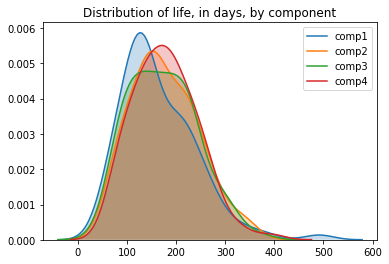

In [18]:
#clear differences in life duration... comp4 lasts much longer than comp1
sns.kdeplot(data=df_maxLife['comp1'], label="comp1", shade=True)
sns.kdeplot(data=df_maxLife['comp2'], label="comp2", shade=True)
sns.kdeplot(data=df_maxLife['comp3'], label="comp3", shade=True)
sns.kdeplot(data=df_maxLife['comp4'], label="comp4", shade=True)

# Add title
plt.title("Distribution of life, in days, by component")

In [41]:
#check how long each component lasts, by model
df_maxLife_model = df.groupby('model').agg({'comp1':max, 'comp2':max, 'comp3':max, 'comp4':max}).reset_index()
print(df_maxLife_model.head())

    model  comp1  comp2  comp3  comp4
0  model1    257    271    278    259
1  model2    382    281    292    262
2  model3    491    348    318    292
3  model4    348    302    370    394


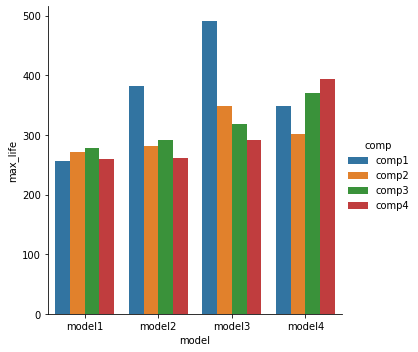

In [52]:
#why does component life vary by model?
df_maxLife_model_melt = pd.melt(df_maxLife_model, id_vars='model', value_vars=['comp1', 'comp2', 'comp3', 'comp4'])
df_maxLife_model_melt.columns = ['model', 'comp', 'max_life']
df_maxLife_model_melt
sns.catplot(x="model", y="max_life", hue="comp", kind="bar", data=df_maxLife_model_melt);

Text(0.5, 1.0, 'Scaled features over time')

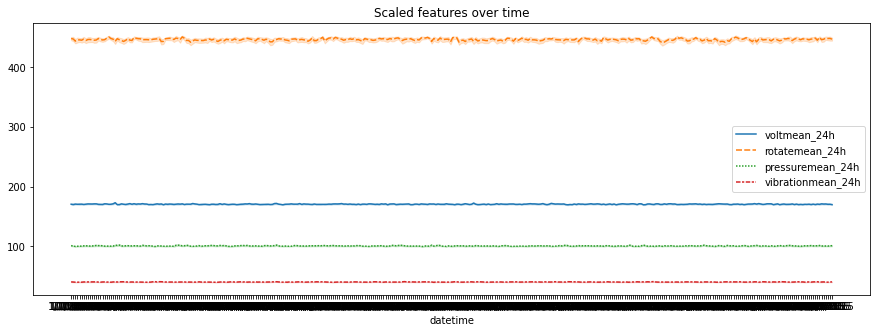

In [55]:
df.set_index('datetime', inplace=True)
plt.figure(figsize=(15,5))
sns.lineplot(data=df[['voltmean_24h', 'rotatemean_24h','pressuremean_24h', 'vibrationmean_24h']])
plt.title("Scaled features over time")

Text(0.5, 1.0, 'Features over time')

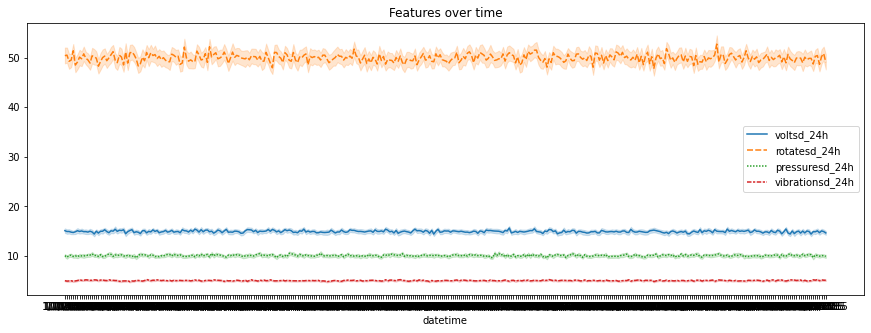

In [56]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df[['voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h']])
plt.title("Features over time")